# MLP Gradient Descent
* Without Error Backpropagation

# I. 함수 정의

> ## 1) Activation - sigmoid( )

In [0]:
import numpy as np
np.set_printoptions(suppress = True, precision = 3)

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

> ## 2) Classification - Machine( )

In [0]:
def Machine(x1, x2,
            w1_11, w1_12, b1_1,
            w1_21, w1_22, b1_2,
            w2_11, w2_12, b2_1):
    
    y1 = sigmoid(x1 * w1_11 + x2 * w1_12 + b1_1)
    y2 = sigmoid(x1 * w1_21 + x2 * w1_22 + b1_2)

    y_hat = sigmoid(y1 * w2_11 + y2 * w2_12 + b2_1)

    return y_hat

> ## 3) Binary Cross Entropy - Cost( )

In [0]:
def Cost(x1, x2, y,
         w1_11, w1_12, b1_1,
         w1_21, w1_22, b1_2,
         w2_11, w2_12, b2_1):
    
    y_hat = Machine(x1, x2,
                    w1_11, w1_12, b1_1,
                    w1_21, w1_22, b1_2,
                    w2_11, w2_12, b2_1)
    
    loss = np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

    return loss

> ## 4) Gradient Descent - Learning( )

In [0]:
def Learning(x1, x2, y,
             w1_11, w1_12, b1_1,
             w1_21, w1_22, b1_2,
             w2_11, w2_12, b2_1,
             step):
    
    current = Cost(x1, x2, y,
                   w1_11, w1_12, b1_1,
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1)
    
    dw1_11 = (Cost(x1, x2, y,
                   w1_11 + 0.0001, w1_12, b1_1, 
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1) - current) / 0.0001

    dw1_12 = (Cost(x1, x2, y,
                   w1_11, w1_12 + 0.0001, b1_1, 
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1) - current) / 0.0001

    db1_1  = (Cost(x1, x2, y,
                   w1_11, w1_12, b1_1 + 0.0001, 
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1) - current) / 0.0001

    dw1_21 = (Cost(x1, x2, y,
                   w1_11, w1_12, b1_1, 
                   w1_21 + 0.0001, w1_22, b1_2,
                   w2_11, w2_12, b2_1) - current) / 0.0001

    dw1_22 = (Cost(x1, x2, y,
                   w1_11, w1_12, b1_1, 
                   w1_21, w1_22 + 0.0001, b1_2,
                   w2_11, w2_12, b2_1) - current) / 0.0001

    db1_2  = (Cost(x1, x2, y,
                   w1_11, w1_12, b1_1, 
                   w1_21, w1_22, b1_2 + 0.0001,
                   w2_11, w2_12, b2_1) - current) / 0.0001

    dw2_11 = (Cost(x1, x2, y,
                   w1_11, w1_12, b1_1, 
                   w1_21, w1_22, b1_2,
                   w2_11 + 0.0001, w2_12, b2_1) - current) / 0.0001

    dw2_12 = (Cost(x1, x2, y,
                   w1_11, w1_12, b1_1, 
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12 + 0.0001, b2_1) - current) / 0.0001

    db2_1  = (Cost(x1, x2, y,
                   w1_11, w1_12, b1_1, 
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1 + 0.0001) - current) / 0.0001

    w1_11 = w1_11 - step * dw1_11
    w1_12 = w1_12 - step * dw1_12
    b1_1  = b1_1  - step * db1_1

    w1_21 = w1_21 - step * dw1_21
    w1_22 = w1_22 - step * dw1_22
    b1_2  = b1_2  - step * db1_2

    w2_11 = w2_11 - step * dw2_11
    w2_12 = w2_12 - step * dw2_12
    b2_1  = b2_1  - step * db2_1

    return np.array([w1_11, w1_12, b1_1,
                     w1_21, w1_22, b1_2,
                     w2_11, w2_12, b2_1])

# II. Data Set - Default.csv

> ## 1) File Upload

In [65]:
!ls -l

total 304
-rw-r--r-- 1 root root 306177 Feb 16 12:27 Default.csv
drwxr-xr-x 1 root root   4096 Feb  5 18:37 sample_data


> ## 2) File Read

In [66]:
import pandas as pd

DF = pd.read_csv('Default.csv')

DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


> ## 3) Input and Target Data

In [0]:
input1 = np.array(DF[['balance']].head(2000))
input2 = np.array(DF[['income']].head(2000))

target = DF['default'].head(2000)

> ## 4) One-Hot Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(target)
y = encoder.transform(target)

y.shape

(2000,)

> ## 5) Standardization

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(input1)
scaler.fit(input2)

x1 = scaler.transform(input1)
x2 = scaler.transform(input2)

print(x1.shape, x2.shape)

(2000, 1) (2000, 1)


# III. Model Training(Learning)

> ## 1) Prameters(w & b) 초기화

In [0]:
    w1_11 = 0.001
    w1_12 = 0.002
    b1_1  = 0.003

    w1_21 = 0.004
    w1_22 = 0.005
    b1_2  = 0.006

    w2_11 = 0.007
    w2_12 = 0.008
    b2_1  = 0.009

> ## 2) 학습 실행

* 약 3분

In [0]:
cost = np.ones(500)

for i in range(0, 500):

    cost[i] = Cost(x1, x2, y,
                   w1_11, w1_12, b1_1,
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1)

    temp = Learning(x1, x2, y,
                    w1_11, w1_12, b1_1,
                    w1_21, w1_22, b1_2,
                    w2_11, w2_12, b2_1,
                    0.05)

    w1_11 = temp[0]
    w1_12 = temp[1]
    b1_1  = temp[2]

    w1_21 = temp[3]
    w1_22 = temp[4]
    b1_2  = temp[5]

    w2_11 = temp[6]
    w2_12 = temp[7]
    b2_1  = temp[8]

> ## 3) Updated Parameters

In [73]:
print(temp)

[-0.406  0.001  0.17  -0.402  0.004  0.172 -0.983 -0.98  -1.661]


> ## 4) loss Visualization

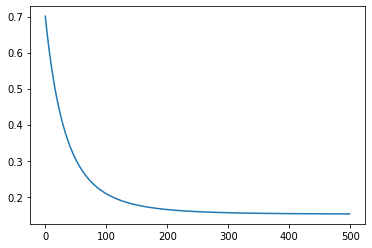

In [74]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.show()

# 
# 
# 
# The End
# 
# 
# 